# CliffWorld

Problem 1: A programming problem on tabular RL methods (30 points)
In this problem, you will implement Q-learning and SARSA on a Cliff Walking problem and compare
their performance.

Problem statement: Cliffworld! This is a gridworld with a cliff. The description can be found
in Sutton and Barto’s Example 6.6. It is a useful example to gain intuition into how Q-learning and
SARSA’s approach to learning differs from each other.

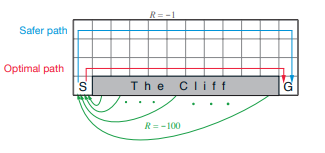

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt

We're making the world half the size since we don't want to write out all the states. We should still see the same results though

In [ ]:
# UDLR
transitions = [
	[6,0,0,1], 		#s0 start
	[0,0,0,0], 		#s1 cliff 
	[0,0,0,0], 		#s2 cliff
	[0,0,0,0], 		#s3 cliff
	[0,0,0,0], 		#s4 cliff
	[5,5,5,5], 		#s5 Terminal
	[12,0,6,7], 	#s6
	[13,1,6,8], 	#s7
	[14,2,7,9], 	#s8
	[15,3,8,10], 	#s9 
	[16,4,9,11], 	#s10 
	[17,5,10,11], 	#s11 
    [18,6,12,13], 	#s12
	[19,7,12,14], 	#s13
	[20,8,13,15], 	#s14 
	[21,9,14,16], 	#s15 
	[22,10,15,17], 	#s16 
    [23,11,16,17], 	#s17
	[18,12,18,19], 	#s18
	[19,13,18,20], 	#s19
	[20,14,19,21], 	#s20 
	[21,15,20,22], 	#s21 
    [22,16,21,23], 	#s22 
	[23,17,22,23], 	#s23 
] 


In [ ]:
# Reward Function
def r(s):
    if s in (1,2,3,4):
        return -100
    else:
        return -1


In [ ]:
def moving_average(data, num_points=3):
    average_arr = []
    for i in range(num_points, len(data) -num_points):
        average_arr.append(sum(data[i:i+num_points])/num_points)
    return average_arr

In [ ]:
def egreedy_policy(q_values, state, epsilon=0.1):  
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        return np.argmax(q_values[state])

In [ ]:
def Q_Learning(num_episodes, num_states = 24, num_actions = 4, gamma = 1, alpha = 1):
    q_val = np.zeros((num_states, num_actions))
    episode_rewards = []
    for _ in range(num_episodes):
        episode_reward = 0
        state = 0 # Initialize S
        while state != 5: 
            action = egreedy_policy(q_val, state, epsilon = 0.1) #Choose Action from state based on policy
            next_state = transitions[state][action] #Take Action A, Observe R, S'
            q_val[state][action] = q_val[state][action] + alpha * (r(state) + gamma*np.max(q_val[next_state]) - q_val[state][action]) 
            episode_reward += r(state)
            state = next_state
        episode_rewards.append(episode_reward)
    return q_val, episode_rewards

In [ ]:
def sarsa(num_episodes, num_states = 24, num_actions = 4, gamma = 1, alpha = 1):
    q_val = np.zeros((num_states, num_actions))
    episode_rewards = []
    for _ in range(num_episodes):
        episode_reward = 0
        state = 0 # Initialize S
        action = egreedy_policy(q_val, state, epsilon = 0.1) #Choose Action from state based on policy

        while state != 5: 
            next_state = transitions[state][action] #Take Action A, Observe R, S'
            next_action = egreedy_policy(q_val, next_state, epsilon = 0.1) #Choose Action from state based on policy
            q_val[state][action] = q_val[state][action] + alpha * (r(state) + gamma*q_val[next_state][next_action] - q_val[state][action]) 
            episode_reward += r(state)
            state = next_state
            action = next_action
            
        episode_rewards.append(episode_reward)
    return q_val, episode_rewards

In [9]:
num_states = 24
num_actions = 4 
gamma = 1
alpha = 1


q_val, episode_rewards = Q_Learning(500)
print(q_val)

[[  -7.   -8.   -8. -108.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [   0.    0.    0.    0.]
 [  -8.   -8.   -7.   -6.]
 [  -7. -108.   -7.   -5.]
 [  -6. -108.   -6.   -4.]
 [  -5. -108.   -5.   -3.]
 [  -4. -108.   -4.   -2.]
 [  -3.   -1.   -3.   -2.]
 [  -8.   -7.   -7.   -7.]
 [  -7.   -6.   -7.   -6.]
 [  -7.   -5.   -7.   -5.]
 [  -5.   -4.   -4.   -4.]
 [  -4.   -3.   -4.   -3.]
 [  -3.   -2.   -4.   -3.]
 [  -8.   -8.   -8.   -7.]
 [  -7.   -7.   -8.   -7.]
 [  -7.   -6.   -6.   -6.]
 [  -6.   -5.   -6.   -5.]
 [  -5.   -4.   -4.   -4.]
 [  -4.   -3.   -3.   -3.]]


In [10]:
q_val, episode_rewards = Q_Learning(500)
print(q_val)

[[  -7.   -8.   -8. -108.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [-107. -107. -107. -107.]
 [   0.    0.    0.    0.]
 [  -8.   -8.   -7.   -6.]
 [  -7. -108.   -7.   -5.]
 [  -6. -108.   -6.   -4.]
 [  -5. -108.   -5.   -3.]
 [  -4. -108.   -4.   -2.]
 [  -3.   -1.   -3.   -2.]
 [  -8.   -7.   -8.   -7.]
 [  -7.   -6.   -7.   -6.]
 [  -6.   -5.   -6.   -5.]
 [  -5.   -4.   -4.   -4.]
 [  -4.   -3.   -4.   -3.]
 [  -4.   -2.   -2.   -2.]
 [  -8.   -8.   -8.   -7.]
 [  -7.   -7.   -8.   -6.]
 [  -6.   -6.   -6.   -6.]
 [  -5.   -5.   -6.   -5.]
 [  -5.   -4.   -4.   -4.]
 [  -4.   -3.   -5.   -3.]]


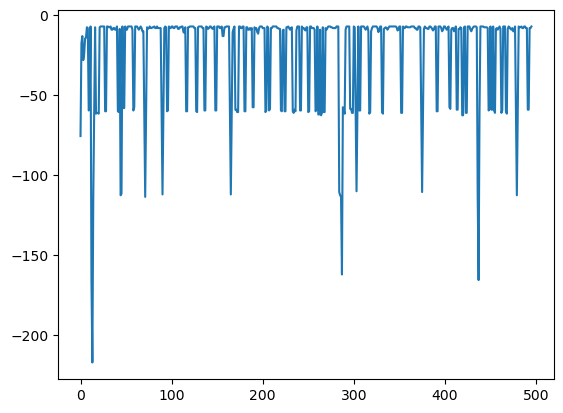

In [11]:
reward_average = moving_average(episode_rewards, 2)
plt.plot(reward_average[0:])
plt.show()